In [2]:
import random

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import cPickle as pickle

from hlt import *

import MyBot

In [22]:
reload(MyBot)

<module 'MyBot' from 'MyBot.py'>

In [3]:
with open('gameMap.p','rb') as f:
    myID,gameMap = pickle.load(f)

In [45]:
def plot_squares(locs,height,width,res=2):
    im = np.zeros((height*res,width*res))
    for loc in locs:
        im[loc.y*res:loc.y*res+res,loc.x*res:loc.x*res+res]=1
    plt.imshow(im)

def plot_quantity(gameMap,quantity,res=2,function=None):
    if function is None:
        function = lambda x:x
    im = np.zeros((gameMap.height*res,gameMap.width*res))
    for y in range(gameMap.height):
        for x in range(gameMap.width):
            loc = Location(x,y)
            im[loc.y*res:loc.y*res+res,loc.x*res:loc.x*res+res]=function(getattr(gameMap.getSite(loc),quantity))
    plt.imshow(im)

def plot_quantity_and_dots(locs,gameMap,quantity,res=2,function=None):
    plt.scatter([l.x*res for l in locs],[l.y*res for l in locs])
    plot_quantity(gameMap,quantity,res,function)

In [32]:
plt.scatter?

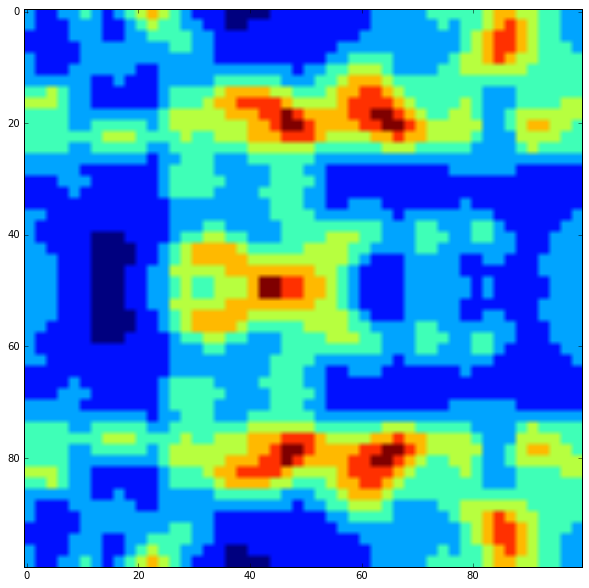

In [50]:
plt.figure(figsize=(10,10))
plot_quantity(gameMap,"production")

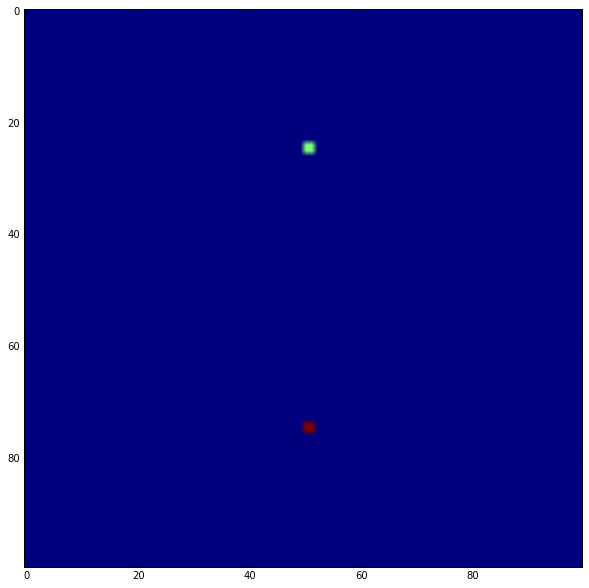

In [43]:
plt.figure(figsize=(10,10))
plot_quantity(gameMap,"owner")

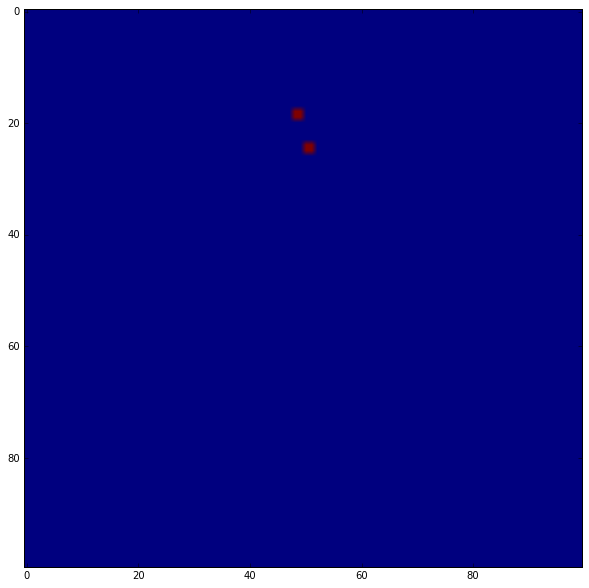

In [46]:
plt.figure(figsize=(10,10))
plot_squares([start,end],gameMap.height,gameMap.width)

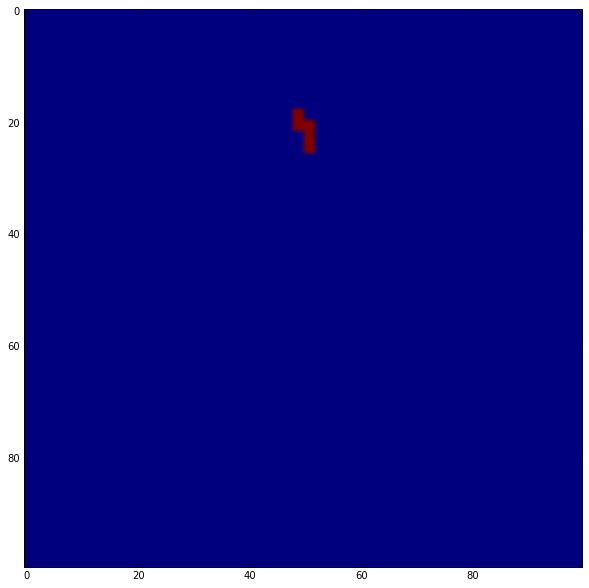

In [47]:
plt.figure(figsize=(10,10))
plot_squares(path,gameMap.height,gameMap.width)

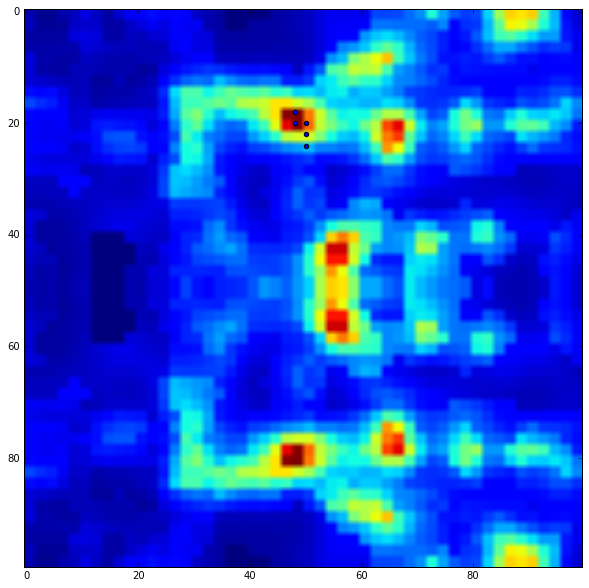

In [49]:
plt.figure(figsize=(10,10))
plot_quantity_and_dots(path,gameMap,"attractiveness")

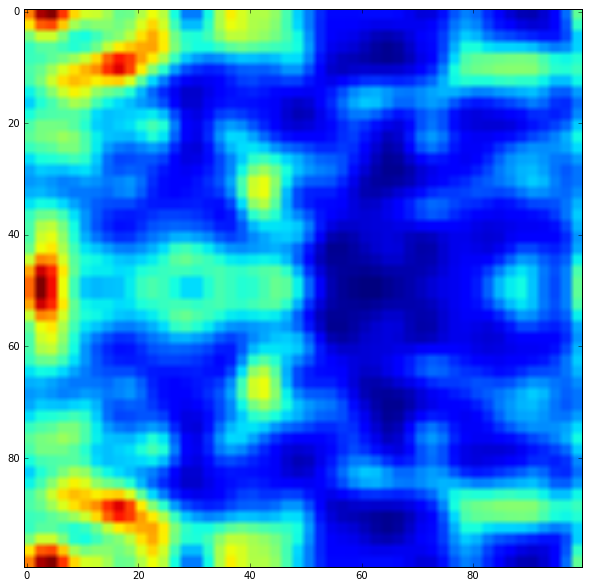

In [51]:
plt.figure(figsize=(10,10))
plot_quantity(gameMap,"strength")

In [13]:
start = MyBot.findStart(myID,gameMap)

In [17]:
MyBot.mapAttractiveness(myID,gameMap)
MyBot.mapSmoothedAttractiveness(myID,gameMap,kernel=[1.5,1.5,1.5,1.5])

In [18]:
end = MyBot.findLocalMaxSmootherAttr(start,myID,gameMap,regionRadius=10)

In [30]:
path = MyBot.a_star(start,end,gameMap)

In [8]:
gameMap

<hlt.GameMap instance at 0x7fd71b866758>

In [52]:
d = {1:4,4:6,3:4}

In [53]:
d.items()

[(1, 4), (3, 4), (4, 6)]

In [54]:
gameMap.getSite(Location(3,4))

<hlt.Site instance at 0x7fd71b744998>

In [57]:
gameMap.getLocation(0,0)

0

In [55]:
Location(0,0)

<hlt.Location instance at 0x7fd718fbb998>

In [56]:
str(Location(0,0))

'<hlt.Location instance at 0x7fd71943a830>'